In [1]:
import pyximport
pyximport.install()
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import gammapy
import operator
from gammapy.maps import Map
from gammapy.modeling import Fit,  Parameters, Covariance , Parameter
from gammapy.datasets import MapDataset ,Datasets
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    SkyModel,
    PointSpatialModel,
    GaussianSpatialModel,
    Models,
    FoVBackgroundModel,
    GaussianSpectralModel,
    CompoundSpectralModel
)
import sys
sys.path.append('../../')
from Dataset_Creation import sys_dataset
import Dataset_load 

In [2]:
figformat = 'svg'

In [6]:
sigma_cases = [0.02, 0.06, 0.2]
datasets_asimov = []
for s in sigma_cases:
    d = Dataset_load.create_asimov(gun = True)
    d.models[0].spectral_model.parameters['sigma'].value = s
    # set npred again
    d.counts = d.npred()
    datasets_asimov.append(d)

update
update
update
update
update
update


In [28]:
zero = 1e-12

r = 0.0
r_assumed = 0.1
b = 0
b_assumed = zero


In [36]:
def create_dataset(dataset_asimov, b, r, b_assumed, r_assumed):
    i = 0
    sys_d_cor = sys_dataset(dataset_asimov= dataset_asimov,
                        shift = 0,
                        tilt = 0,
                        bias = b, 
                        resolution = s,
                        rnd = False,
                        e_reco_creation=10,
                        gun = True)
    dataset_conv = sys_d_cor.create_dataset()
    dataset_conv_N = sys_d_cor.create_dataset_N(10)
    dataset_conv_N.models.parameters['bias'].frozen  = True
    dataset_conv_N.models.parameters['norm_nuisance'].frozen  = True
    
    penalising_invcovmatrix = np.zeros((4,4))
    np.fill_diagonal(penalising_invcovmatrix, [1/b_assumed**2, 1/r_assumed**2, 1/zero**2, 1/zero**2])
    dataset_conv_N.penalising_invcovmatrix = penalising_invcovmatrix
    i +=1
    return dataset_conv, dataset_conv_N

datasets_conv =[]
datasets_conv_N =[]

for i, d in enumerate(datasets_asimov):
    dataset_conv, dataset_conv_N  = create_dataset(d, b, r,
                                                  b_assumed, r_assumed)
    datasets_conv.append(dataset_conv)
    datasets_conv_N.append(dataset_conv_N)
    


update
update
update
update
update
update


In [37]:
energy = datasets_conv[0].counts.geom.axes[0].center.value
energy_bounds = (energy[0], energy[-1] ) * u.TeV
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


colors_standard = ['darkmagenta', 'darkred', 'darkolivegreen', 'darkred']
colors_nui = ['cornflowerblue', 'navy', 'darkolivegreen', 'darkred']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_standard = 'darkmagenta'; color_nui = 'royalblue'
color_standard_ = 'darkred'; color_nui_ = 'navy'

In [38]:
def sum_e (data):
    return data.sum(axis=2).sum(axis=1)

eaxis_standard = datasets_asimov[0].geoms['geom'].axes[0]

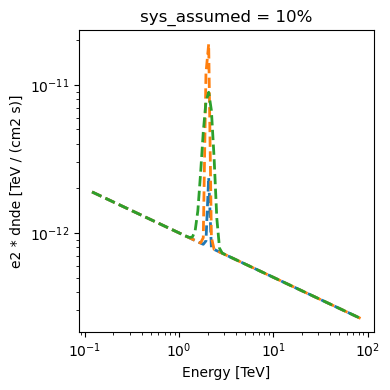

In [39]:
fig,axs = plt.subplots(1,1, sharey=True,figsize = (4,4))
if len(datasets_conv)==1:
    axs = [axs]
for d in datasets_asimov:
    d.models[0].spectral_model.plot(energy_bounds, energy_power = 2, ax =axs, 
                                label = "Input", linewidth = 2, linestyle="dashed")
axs.set_title("sys_assumed = 10%"); 
plt.tight_layout()
fig = plt.gcf()


In [58]:
for i,simga in enumerate(sigma_cases):

    print("read")
    for i, d in enumerate(datasets_conv):
        path = f'data/2_model_bias_0_{r}_simga_{simga_cases[i]}.yml'
        datasets_conv[i] = Dataset_load.load_dataset_N(d, path)        
    print("read nui")
    for i, d in enumerate(datasets_conv_N):
        path = f'data/2_model_nui_bias_0_{r}_simga_{simga_cases[i]}.yml'
        datasets_conv_N[i] = Dataset_load.load_dataset_N(d, path)  

read
read nui
read
read nui
read
read nui


In [60]:
print(datasets_conv_N[1].models)

DatasetModels

Component 0: SkyModel

  Name                      : s1wEBMPw
  Datasets names            : None
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      2.302   +/-    0.07             
    amplitude                     :   1.01e-12   +/- 7.2e-14 1 / (cm2 s TeV)
    reference             (frozen):      1.000       TeV         
    amplitude_                    :      0.000   +/-    0.00 1 / (cm2 s) 
    mean                          :      2.000   +/-    0.38 TeV         
    sigma                         :      0.060   +/-    0.38 TeV         
    lon_0                 (frozen):     83.631       deg         
    lat_0                 (frozen):     22.018       deg         
    sigma                         :      0.019   +/-    0.01 deg         
    e                     (frozen):      0.000                   
    phi                   (fr

In [70]:
default_col = ['tab:blue', 'tab:orange', 'tab:green']

Text(0, 0.5, 'Fitted Peak Sigma [Input Peak Sigma]  ')

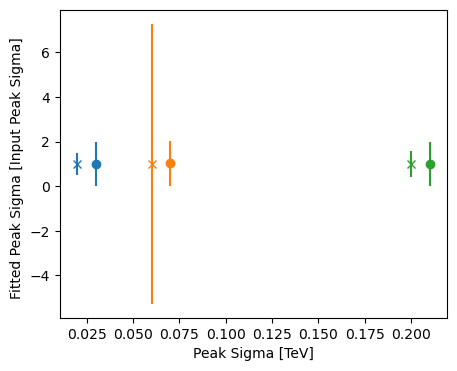

In [73]:
fig, axs = plt.subplots(1,1, figsize= (5, 4))
for i, sigma in enumerate(sigma_cases):
    s_N = datasets_conv_N[i].models.parameters['sigma'].value
    s_N_error = datasets_conv_N[i].models.parameters['sigma'].error
    s = datasets_conv[i].models.parameters['sigma'].value
    s_error = datasets_conv[i].models.parameters['sigma'].error
    
    axs.errorbar(sigma, s_N/sigma, yerr = s_N_error/sigma, fmt='x', color = default_col[i])
    axs.errorbar(sigma+ 0.01, s/sigma, yerr = s_N/sigma, fmt='o', color = default_col[i])    
    
axs.set_xlabel("Peak Sigma [TeV]")
axs.set_ylabel("Fitted Peak Sigma [Input Peak Sigma]  ")

#plt.xscale('log')

Text(0, 0.5, 'Fitted Peak Energy [TeV]  ')

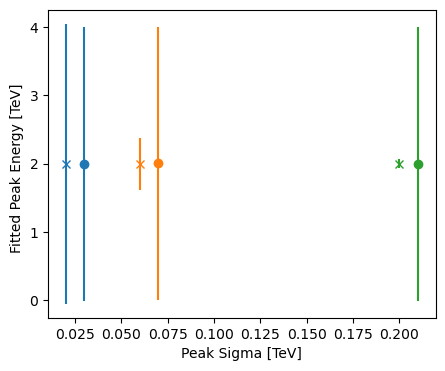

In [77]:
fig, axs = plt.subplots(1,1, figsize= (5, 4))
for i, sigma in enumerate(sigma_cases):
    s_N = datasets_conv_N[i].models.parameters['mean'].value
    s_N_error = datasets_conv_N[i].models.parameters['mean'].error
    s = datasets_conv[i].models.parameters['mean'].value
    s_error = datasets_conv[i].models.parameters['mean'].error
    
    axs.errorbar(sigma, s_N, yerr = s_N_error, fmt='x', color = default_col[i])
    axs.errorbar(sigma+ 0.01, s, yerr = s_N, fmt='o', color = default_col[i])    
    
axs.set_xlabel("Peak Sigma [TeV]")

axs.set_ylabel("Fitted Peak Energy [TeV]  ")

#plt.xscale('log')